<a href="https://colab.research.google.com/github/AkliYalaoui/Deceptive-Opinion-Spam-Classification/blob/main/Attention_based_Bidirectional_LSTM_for_Deceptive_Opinion_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn import preprocessing

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('/content/drive/MyDrive/yelp_data/deceptive-opinion.csv')

In [6]:
df.head(5)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [8]:
df = df.drop(["hotel", "polarity","source"], axis=1)
df = df.sample(frac=1)
df.head()

,deceptive,text
713,deceptive,My stay at the Hotel Monaco Chicago was amazin...
158,truthful,everything that i read from other reviews was ...
705,deceptive,Fantastic stay! The hotel was beautifully deco...
507,deceptive,I travel often and whenever I travel I prefer ...
760,deceptive,This is a review of a first class hotel the In...


In [9]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['deceptive']= label_encoder.fit_transform(df['deceptive'])

df['deceptive'].unique()

array([0, 1])

In [10]:
df.head()

,deceptive,text
713,0,My stay at the Hotel Monaco Chicago was amazin...
158,1,everything that i read from other reviews was ...
705,0,Fantastic stay! The hotel was beautifully deco...
507,0,I travel often and whenever I travel I prefer ...
760,0,This is a review of a first class hotel the In...


In [11]:
df.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  My stay at the Hotel Monaco Chicago was amazin...    1
1           800    796  My daughter and I woke in the morning wanting ...    2

In [12]:
def clean_text(text):

    ## Remove puncuation
    text = text.translate(string.punctuation)

    ## Convert words to lower case and split them
    text = text.lower().split()

    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [13]:
 # Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [14]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [15]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))
df['text'] = df['text'].map(lambda a: clean_char(a))
df['text'] = df['text'].map(lambda a: clean_text(a))

df['text']

713     stay hotel monaco chicago amaz staff polit wel...
158     everyth read review pretti much money excel cu...
705     fantast stay hotel beauti decor immacul clean ...
507     travel often whenev travel prefer stay hilton ...
760     review first class hotel intercontinent chicag...
                              ...                        
447     hyatt regenc chicago hotel delight stay never ...
807     complet disappoint problem alarm clock stereo ...
1030    reserv room sleeper couch week stay check unpa...
575     town visit cousin stay three night wonder hote...
936     one worst travel experi quit time arriv constr...
Name: text, Length: 1600, dtype: object

In [16]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 713 to 936
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   int64 
 1   text       1600 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [18]:
x = df['text']
y = df['deceptive']

# 2. Machine learning Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [21]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [22]:
ml_results = {"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Accuracy (%)" : [],
              "Precision Score": [],
              "Recall Score": [],
              "F1 Score": []}

In [23]:
hyper_params_best_results={"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Best Param":[],
              "Accuracy (%)" : [],
              "Precision Score": [],
              "Recall Score": [],
              "F1 Score": []}


### A. Multinomial Naive Bayes

#### Hyper Params Tuning

In [24]:
# hyper params tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}

# Initialize the grid search
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')

# Perform the grid search
grid_search_nb.fit(training_data, y_train)

# Print the best parameters
print("Best parameters for Multinomial Naive Bayes:", grid_search_nb.best_params_)

# Use the best model for prediction
nb_best_model = grid_search_nb.best_estimator_

Best parameters for Multinomial Naive Bayes: {'alpha': 1.0}


In [25]:
pd.DataFrame(grid_search_nb.cv_results_)[['params', 'mean_test_score']]

,params,mean_test_score
0,{'alpha': 0.01},0.805833
1,{'alpha': 0.1},0.831667
2,{'alpha': 0.5},0.850833
3,{'alpha': 1.0},0.856667
4,{'alpha': 2.0},0.856667


In [26]:
best_pred_MNB=nb_best_model.predict(testing_data)

In [27]:
hyper_params_best_results["Accuracy (%)"].append(round(accuracy_score(y_test, best_pred_MNB), 4))
hyper_params_best_results["Precision Score"].append(round(precision_score(y_test, best_pred_MNB), 4))
hyper_params_best_results["Recall Score"].append(round(recall_score(y_test, best_pred_MNB), 4))
hyper_params_best_results["F1 Score"].append(round(f1_score(y_test, best_pred_MNB), 4))
hyper_params_best_results["Best Param"].append(grid_search_nb.best_params_)

#### Paper Models

In [28]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [29]:
predictions = naive_bayes.predict(testing_data)

In [30]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, predictions), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, predictions), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, predictions), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, predictions), 4))

### B. Stochastic Gradient Descent

#### Hyper Params Tuning

In [31]:
#hyper params tuning

# Define the parameter grid
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet']
}

# Initialize the grid search
grid_search_sgd = GridSearchCV(SGDClassifier(), param_grid_sgd, cv=5, scoring='accuracy')

# Perform the grid search
grid_search_sgd.fit(training_data, y_train)

# Use the best model for prediction
sgd_best_model = grid_search_sgd.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [32]:
# Print the best parameters
print("Best parameters for SGD:", grid_search_sgd.best_params_)

Best parameters for SGD: {'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'l2'}


In [33]:
pd.DataFrame(grid_search_sgd.cv_results_)[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.834167
1,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.821667
2,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.840833
3,"{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}",0.829167
4,"{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}",0.839167
5,"{'alpha': 0.0001, 'loss': 'log', 'penalty': 'e...",0.837500
6,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.840833
7,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.832500
8,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.835833
9,"{'alpha': 0.001, 'loss': 'hinge', 'penalty': '...",0.832500


In [34]:
best_pred_SGD = sgd_best_model.predict(testing_data)

In [35]:
hyper_params_best_results["Accuracy (%)"].append(round(accuracy_score(y_test, best_pred_SGD), 4))
hyper_params_best_results["Precision Score"].append(round(precision_score(y_test, best_pred_SGD), 4))
hyper_params_best_results["Recall Score"].append(round(recall_score(y_test, best_pred_SGD), 4))
hyper_params_best_results["F1 Score"].append(round(f1_score(y_test, best_pred_SGD), 4))
hyper_params_best_results["Best Param"].append(grid_search_sgd.best_params_)

#### Paper Model

In [36]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [37]:
sgdpredicted = sgd_clf.predict(testing_data)

In [38]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, sgdpredicted), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, sgdpredicted), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, sgdpredicted), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, sgdpredicted), 4))

### C. Logistic Regression

#### Hyper Params Tuning

In [39]:
#hyper params tuning
# Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize the grid search
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')

# Perform the grid search
grid_search_lr.fit(training_data, y_train)



# Use the best model for prediction
lr_best_model = grid_search_lr.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [40]:
# Print the best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}


In [41]:
pd.DataFrame(grid_search_lr.cv_results_)[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'C': 0.01, 'penalty': 'l1'}",NaN
1,"{'C': 0.01, 'penalty': 'l2'}",0.830000
2,"{'C': 0.1, 'penalty': 'l1'}",NaN
3,"{'C': 0.1, 'penalty': 'l2'}",0.848333
4,"{'C': 1, 'penalty': 'l1'}",NaN
5,"{'C': 1, 'penalty': 'l2'}",0.839167
6,"{'C': 10, 'penalty': 'l1'}",NaN
7,"{'C': 10, 'penalty': 'l2'}",0.835833
8,"{'C': 100, 'penalty': 'l1'}",NaN
9,"{'C': 100, 'penalty': 'l2'}",0.836667


In [42]:
best_pred_LR = lr_best_model.predict(testing_data)

In [43]:
hyper_params_best_results["Accuracy (%)"].append(round(accuracy_score(y_test, best_pred_LR), 4))
hyper_params_best_results["Precision Score"].append(round(precision_score(y_test, best_pred_LR), 4))
hyper_params_best_results["Recall Score"].append(round(recall_score(y_test, best_pred_LR), 4))
hyper_params_best_results["F1 Score"].append(round(f1_score(y_test, best_pred_LR), 4))
hyper_params_best_results["Best Param"].append(grid_search_lr.best_params_)

#### Paper Model

In [44]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [45]:
lrpredicted = lr.predict(testing_data)

In [46]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, lrpredicted), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, lrpredicted), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, lrpredicted), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, lrpredicted), 4))

### D. Support vectors machines

#### Hyper Params Tuning

In [47]:
#hyper param
# Define the parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the grid search
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')

# Perform the grid search
grid_search_svc.fit(training_data, y_train)

# Print the best parameters
print("Best parameters for Support Vector Machine:", grid_search_svc.best_params_)

# Use the best model for prediction
svc_best_model = grid_search_svc.best_estimator_


Best parameters for Support Vector Machine: {'C': 100, 'kernel': 'rbf'}


In [48]:
pd.DataFrame(grid_search_svc.cv_results_)[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'C': 0.1, 'kernel': 'linear'}",0.826667
1,"{'C': 0.1, 'kernel': 'rbf'}",0.676667
2,"{'C': 0.1, 'kernel': 'poly'}",0.597500
3,"{'C': 1, 'kernel': 'linear'}",0.819167
4,"{'C': 1, 'kernel': 'rbf'}",0.833333
5,"{'C': 1, 'kernel': 'poly'}",0.715833
6,"{'C': 10, 'kernel': 'linear'}",0.819167
7,"{'C': 10, 'kernel': 'rbf'}",0.841667
8,"{'C': 10, 'kernel': 'poly'}",0.784167
9,"{'C': 100, 'kernel': 'linear'}",0.819167


In [49]:
best_pred_SVM= svc_best_model.predict(testing_data)

In [50]:
hyper_params_best_results["Accuracy (%)"].append(round(accuracy_score(y_test, best_pred_SVM), 4))
hyper_params_best_results["Precision Score"].append(round(precision_score(y_test, best_pred_SVM), 4))
hyper_params_best_results["Recall Score"].append(round(recall_score(y_test, best_pred_SVM), 4))
hyper_params_best_results["F1 Score"].append(round(f1_score(y_test, best_pred_SVM), 4))
hyper_params_best_results["Best Param"].append(grid_search_svc.best_params_)

#### Paper Model

In [51]:
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [52]:
svc_predictions = svc.predict(testing_data)

In [53]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, svc_predictions), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, svc_predictions), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, svc_predictions), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, svc_predictions), 4))

### E. PERFORMANCE OF VARIOUS CLASSIFICATION ALGORITHMS ON DECEPTIVE OPINION SPAM CORPUS

In [54]:
#best params results
hyper_param_tun_results_df=pd.DataFrame(hyper_params_best_results)
hyper_param_tun_results_df

,Sr. No,Model,Best Param,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,{'alpha': 1.0},0.8900,0.9021,0.875,0.8883
1,2,Stochastic Gradient Descent (SGD),"{'alpha': 0.1, 'loss': 'modified_huber', 'pena...",0.8775,0.8719,0.885,0.8784
2,3,Logistic Regression,"{'C': 0.1, 'penalty': 'l2'}",0.8800,0.8762,0.885,0.8806
3,4,Support Vector Machine,"{'C': 100, 'kernel': 'rbf'}",0.8725,0.8744,0.870,0.8722


In [55]:
#runing the code results
our_results_df = pd.DataFrame(ml_results)
our_results_df

,Sr. No,Model,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,0.8900,0.9021,0.875,0.8883
1,2,Stochastic Gradient Descent (SGD),0.8550,0.8622,0.845,0.8535
2,3,Logistic Regression,0.8800,0.8800,0.880,0.8800
3,4,Support Vector Machine,0.8675,0.8585,0.880,0.8691


In [56]:
#results on the paper

paper_ml_results = {"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Accuracy (%)" : [0.9025, 0.8775, 0.8700, 0.5625],
              "Precision Score": [0.9325, 0.8913, 0.8691, 0.525],
              "Recall Score": [0.8601, 0.8497, 0.8601, 0.9792],
              "F1 Score": [0.8948, 0.8700, 0.8645, 0.6835]}

paper_results_df = pd.DataFrame(paper_ml_results)
paper_results_df

,Sr. No,Model,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,0.9025,0.9325,0.8601,0.8948
1,2,Stochastic Gradient Descent (SGD),0.8775,0.8913,0.8497,0.8700
2,3,Logistic Regression,0.8700,0.8691,0.8601,0.8645
3,4,Support Vector Machine,0.5625,0.5250,0.9792,0.6835


In [57]:
import matplotlib.pyplot as plt

### Paper results vs Runing Code result  

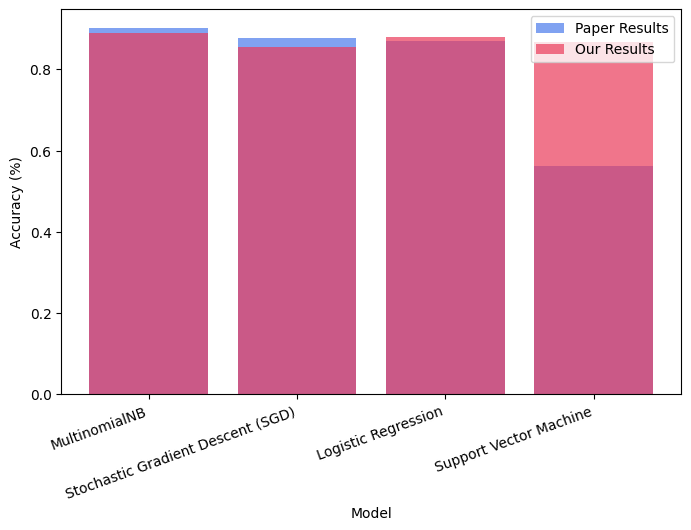

In [58]:

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Accuracy (%)'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Accuracy (%)'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

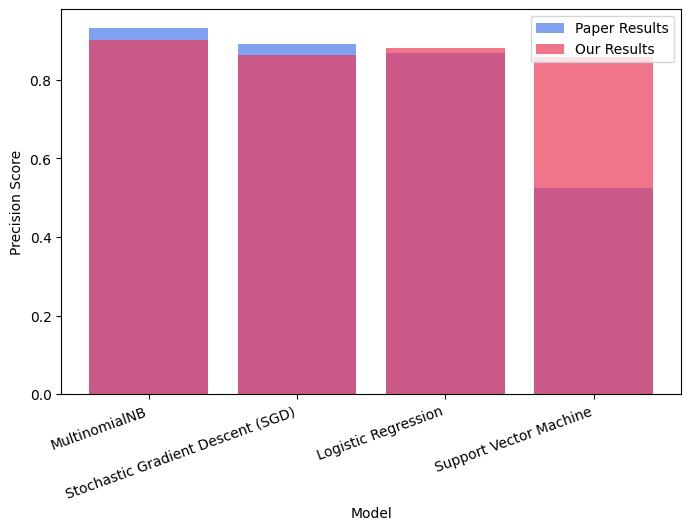

In [59]:
# Plot Precision Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Precision Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Precision Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

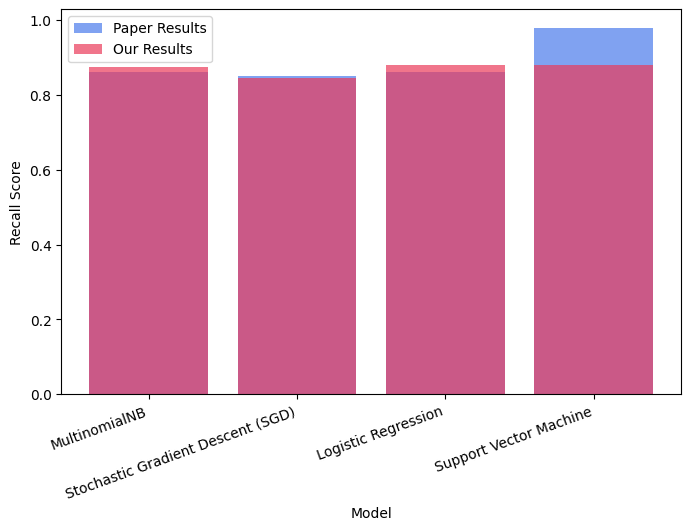

In [60]:
# Plot Recall Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Recall Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Recall Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

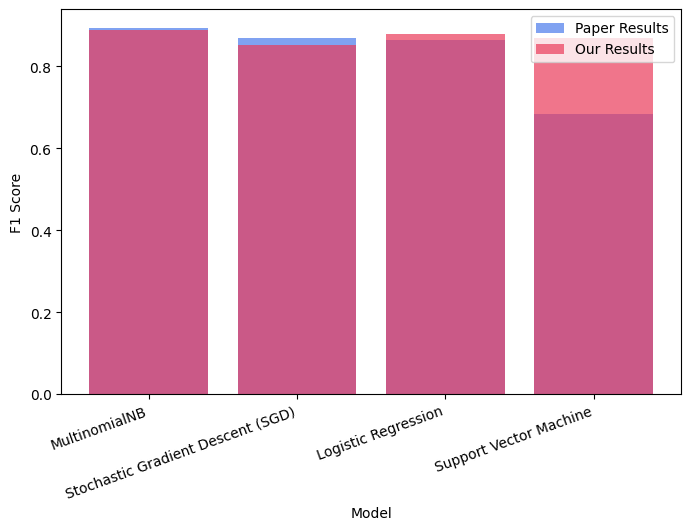

In [61]:
# Plot F1 Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['F1 Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['F1 Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

### Paper results vs best hyper param results

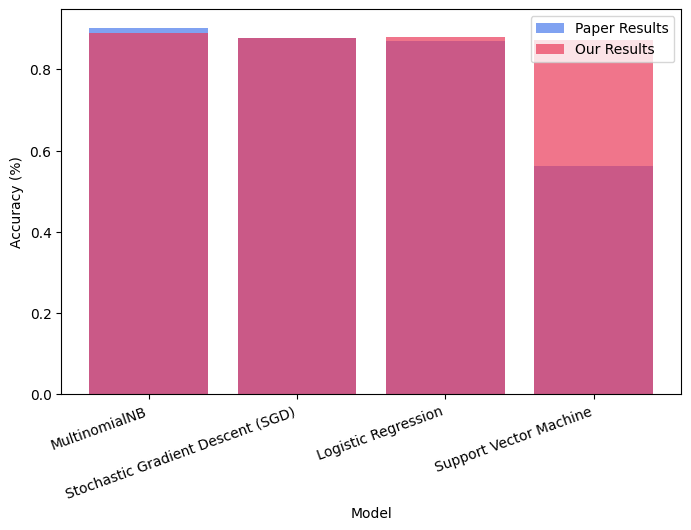

In [62]:

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Accuracy (%)'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(hyper_param_tun_results_df['Model'], hyper_param_tun_results_df['Accuracy (%)'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

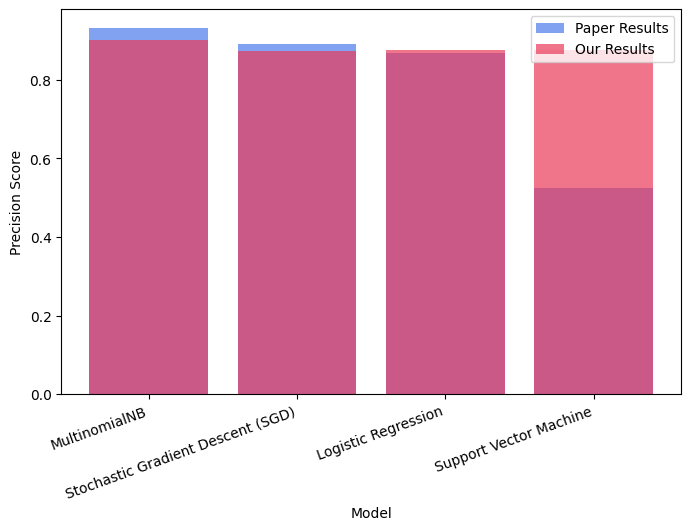

In [63]:
# Plot Precision Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Precision Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(hyper_param_tun_results_df['Model'], hyper_param_tun_results_df['Precision Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

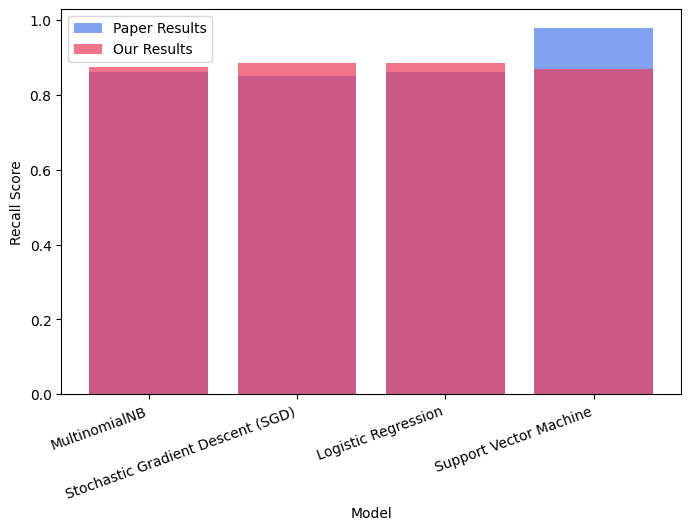

In [64]:
# Plot Recall Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Recall Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(hyper_param_tun_results_df['Model'], hyper_param_tun_results_df['Recall Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

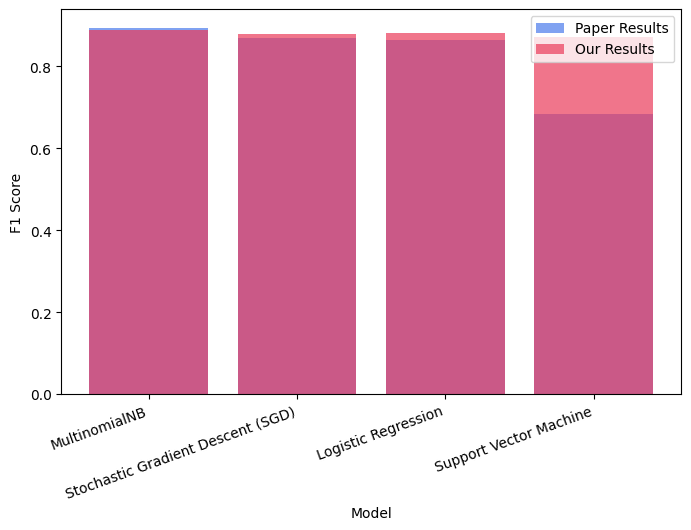

In [67]:
# Plot F1 Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['F1 Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(hyper_param_tun_results_df['Model'], hyper_param_tun_results_df['F1 Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()